In [17]:
ls

data/  EDA.ipynb


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
raw_filename = 'data/ai_challenger_sentiment_analysis_trainingset_20180816/sentiment_analysis_trainingset.csv'
raw = pd.read_csv(raw_filename,index_col=0)

In [13]:
raw.tail(1)

,content,location_traffic_convenience,location_distance_from_business_district,location_easy_to_find,service_wait_time,service_waiters_attitude,service_parking_convenience,service_serving_speed,price_level,price_cost_effective,...,environment_decoration,environment_noise,environment_space,environment_cleaness,dish_portion,dish_taste,dish_look,dish_recommendation,others_overall_experience,others_willing_to_consume_again
id,,,,,,,,,,,,,,,,,,,,,
104999,"""『位置』在大融城LG层美时佳美食广场门口，具体是在好伦哥旁边，湘域斜对面。\n紫色的招牌不...",-2,1,0,-2,0,-2,-2,-2,-2,...,0,-2,-2,1,-2,0,0,-2,0,-2


In [34]:
print("检查训练集的缺失值情况")
null_check=raw.isnull().sum()
print(null_check)
print("数据维度")
print(raw.shape)

检查训练集的缺失值情况
content                                     0
location_traffic_convenience                0
location_distance_from_business_district    0
location_easy_to_find                       0
service_wait_time                           0
service_waiters_attitude                    0
service_parking_convenience                 0
service_serving_speed                       0
price_level                                 0
price_cost_effective                        0
price_discount                              0
environment_decoration                      0
environment_noise                           0
environment_space                           0
environment_cleaness                        0
dish_portion                                0
dish_taste                                  0
dish_look                                   0
dish_recommendation                         0
others_overall_experience                   0
others_willing_to_consume_again             0
dtype: int64
数据维度
(105

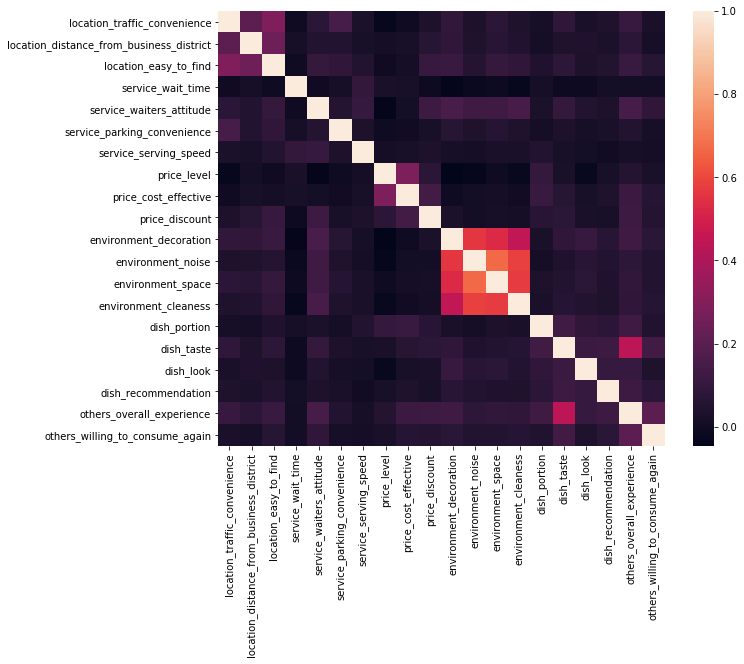

In [35]:
# 查看20列数据的相关性
temp_raw = raw.iloc[:,1:]
corr = temp_raw.corr()
plt.figure(figsize=(10,8))

sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=False)

In [41]:
# 绘制中文词云
from wordcloud import WordCloud
import jieba  
all_text = ' '.join(raw.content.tolist())
all_text = " ".join(jieba.cut(all_text))

Populating the interactive namespace from numpy and matplotlib


(-0.5, 399.5, 199.5, -0.5)

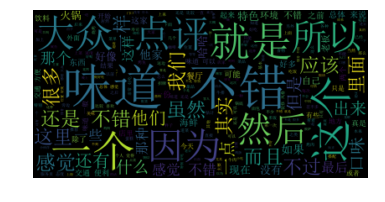

In [45]:
wordcloud = WordCloud(font_path="simsun.ttc",
                      max_words=1000,
                      max_font_size=60).generate(all_text)
%pylab inline

(-0.5, 399.5, 199.5, -0.5)

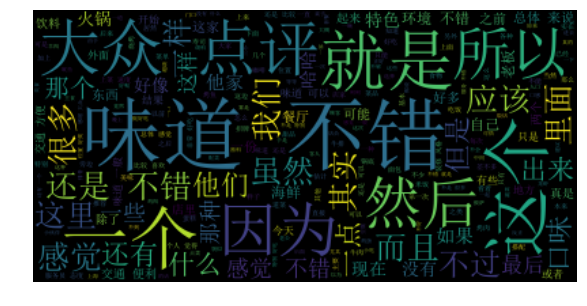

In [54]:
plt.figure(figsize = (20,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")